In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

In [2]:
#loading the required data of Rainfall in Nashville
precip = pd.read_table("data/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


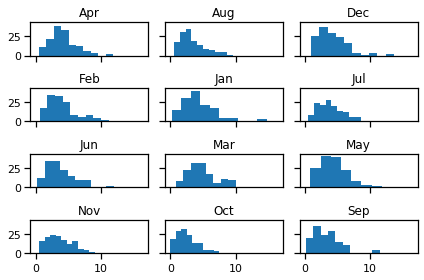

In [3]:
#Plot the histogram of all the month
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [4]:
#handling the missing data 
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,3.32,1.84,2.26,2.75,3.30,2.37,1.47,1.38,1.99,4.95,6.20,3.83
2008,4.76,2.53,5.56,7.20,5.54,2.21,4.32,1.67,0.88,5.03,1.75,6.72
2009,4.59,2.85,2.92,4.13,8.45,4.53,6.03,2.14,11.08,6.49,0.67,3.99


In [5]:
#mean value of the precipitation for all months
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [6]:
# variance of the precipitation 
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

In [7]:
# precipitation for the of April
precip.Apr

Year
1871     4.13
1872     5.91
1873     3.59
1874    11.84
1875     4.22
        ...  
2007     2.75
2008     7.20
2009     4.13
2010     3.48
2011     7.51
Name: Apr, Length: 141, dtype: float64

C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


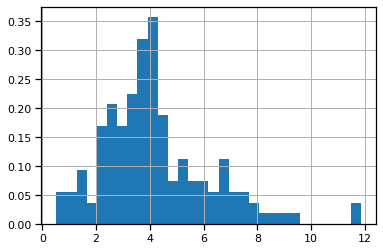

In [8]:
#Histogram the month of April
precip.Apr.hist(normed=True, bins=30)

##EXERCISE 1 : 
Start with the Uniform distribution. Rainfall for the month of April seems to go from 0 to 12 units, so let's pick the Uniform distribution to model the 
𝛼
α
parameter for our gamma function. The Uniform distribution also needs start and end parameters. We pick them to be wide enough to match the data. Then we model april rainfall with the Gamme distribution.

In [9]:

import statistics
model=lambda mu, sig, t: np.random.normal(mu, sig, t)
population = model(4.20, 2.02, 10000)
statistics.stdev(population)

2.0213329544846856

In [10]:
from pymc3 import Model, Uniform,Gamma

with Model() as rainfall_model:
    ualpha = Uniform('ualpha', lower=0, upper=15)
    ubeta = Uniform('ubeta', lower=0, upper=15)

with rainfall_model:
    april_like = Gamma('april_like', alpha=ualpha, beta=ubeta, observed=precip.Apr)

In [11]:
from pymc3 import fit

with rainfall_model: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 368.14: 100%|██████████| 10000/10000 [00:07<00:00, 1269.28it/s]
Finished [100%]: Average Loss = 368


C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


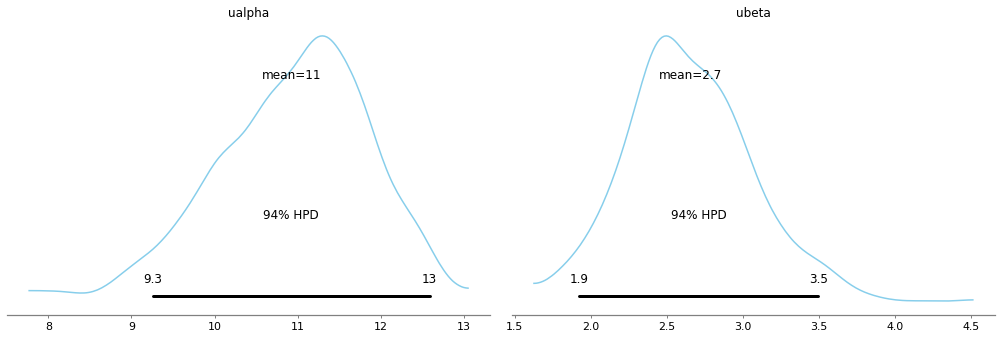

In [12]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ualpha', 'ubeta'],
                color='#87ceeb');

C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


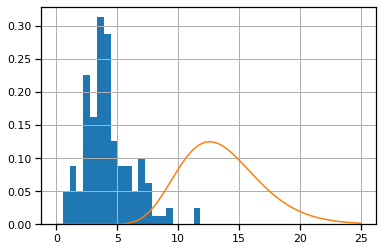

In [13]:
from scipy.stats.distributions import gamma

ualpha_posterior_mean = 11
ubeta_posterior_mean = 2.6

precip.Apr.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ualpha_posterior_mean, ubeta_posterior_mean))

Unform distribution did not work so should try with Normal distribution

### Exercise 2:

Did the Uniform distribution work out well in your modeling exercise above? Well, it didn't for professor!

Let's try the `Normal` distribution instead. Please make sure to introduce **new** variables for your priors (xxxalpha, xxxbeta), as well as your simulation trace (xxxapril_like). Replace xxx with whatever you want.

What's the right support for the normal (the right mean and standard deviation)? Pick a mean that centers the gaussian around the peak of the month, and a standard deviation that allows the gaussian to cover all the data.

In [15]:
from pymc3 import Model, Normal,Gamma

with Model() as rainfall_model:
    nalpha = Normal('nalpha',mu =4.40, sigma=2.04) ##taking mu and sigma based on mean and varience caluculated for precip April
    nbeta = Normal('nbeta', mu=4.40, sigma=2.04) ##taking mu and sigma based on mean and varience calculated for precip April

with rainfall_model:
    Normal_april_like = Gamma('normal_april_like', alpha=nalpha, beta=nbeta, observed=precip.Apr)

In [16]:
from pymc3 import fit

with rainfall_model: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 333.79: 100%|██████████| 10000/10000 [00:07<00:00, 1303.17it/s]
Finished [100%]: Average Loss = 333.73


C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


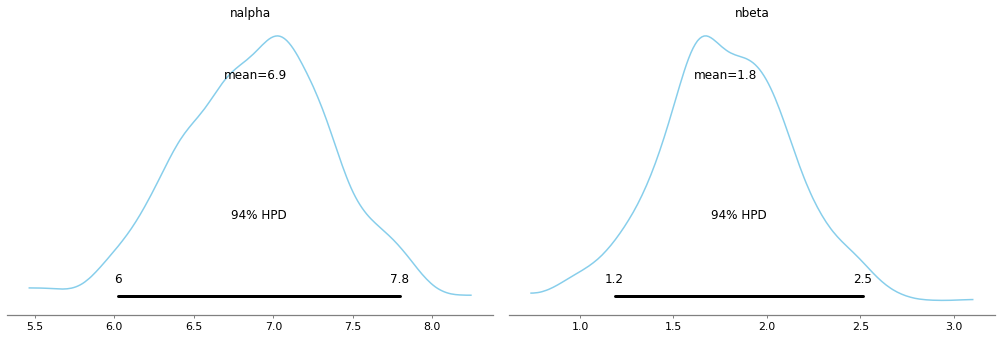

In [17]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['nalpha', 'nbeta'],
                color='#87ceeb');

C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


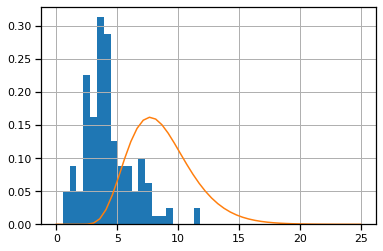

In [18]:
from scipy.stats.distributions import gamma

nalpha_posterior_mean = 6.9
nbeta_posterior_mean = 1.8

precip.Apr.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), nalpha_posterior_mean, nbeta_posterior_mean))

Normal distribution Didn't work so have to try Exponential distrubution

### Exercise 3: 

Let's try to accelerate things and try the exponential distribution, instead. Find the right number $x$ so that the distribution covers the range of possible precipitation values.  In other words, find the right value $y$ such that `Exponential.dist(1/3).random(size=10000)` covers from 0 to 12 for the month of April. Try different values out by plotting with:

```python
sns.distplot(Exponential.dist(1/3).random(size=10000), kde=False);
```


In [19]:
from pymc3 import Model, Exponential,Gamma


with Model() as rainfall_model:
    ealpha = Exponential('ealpha',0.38) ## lambda calculated based on mean of the april month
    ebeta = Exponential('ebeta',0.38)
    
with rainfall_model:
    Exponential_april_like = Gamma('exponential_april_like', alpha=ealpha, beta=ebeta, observed=precip.Apr)

In [20]:
Exponential.dist(0.35).random(size=10000)

array([ 4.25131357,  2.48710584,  0.03485956, ...,  1.29919411,
        0.19387584, 12.02455   ])

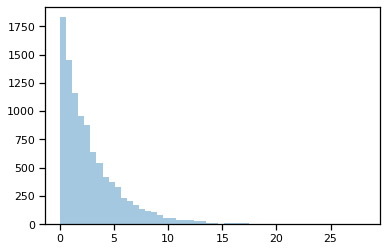

In [21]:
sns.distplot(Exponential.dist(0.35).random(size=10000), kde=False);

In [22]:
from pymc3 import fit

with rainfall_model: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 316.62: 100%|██████████| 10000/10000 [00:07<00:00, 1312.92it/s]
Finished [100%]: Average Loss = 316.5


C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


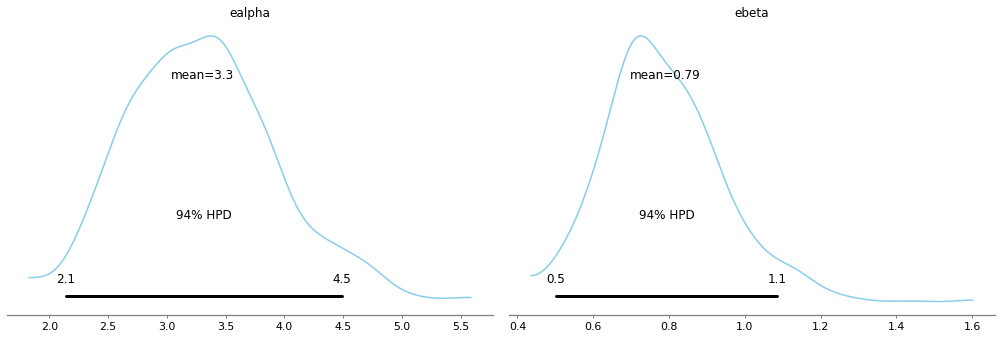

In [23]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha', 'ebeta'],
                color='#87ceeb');

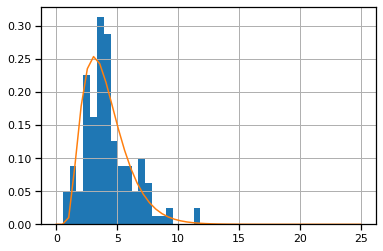

In [25]:
from scipy.stats.distributions import gamma

nalpha_posterior_mean = 3.3
nbeta_posterior_mean = 0.79

precip.Apr.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), nalpha_posterior_mean, nbeta_posterior_mean))

### Exercise 4:

Do the month of January.

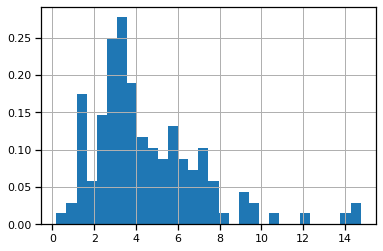

In [26]:
precip.Jan.hist(normed=True, bins=30)

In [27]:
precip.Jan

Year
1871    2.76
1872    2.32
1873    2.96
1874    5.22
1875    6.15
        ... 
2007    3.32
2008    4.76
2009    4.59
2010    4.13
2011    2.31
Name: Jan, Length: 141, dtype: float64

In [28]:
##UNIFORM DISTRIBUTION : 

import statistics
model=lambda mu, sig, t: np.random.normal(mu, sig, t)
population = model(4.52,6.92, 10000)
statistics.stdev(population)


6.896864246501598

In [29]:
from pymc3 import Model, Uniform,Gamma

with Model() as rainfall_model:
    ualpha = Uniform('ualpha', lower=0, upper=17)
    ubeta = Uniform('ubeta', lower=0, upper=17)

with rainfall_model:
    january_like = Gamma('january_like', alpha=ualpha, beta=ubeta, observed=precip.Jan)

In [30]:
 from pymc3 import fit

with rainfall_model: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 460.34: 100%|██████████| 10000/10000 [00:08<00:00, 1204.50it/s]
Finished [100%]: Average Loss = 460.09


C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


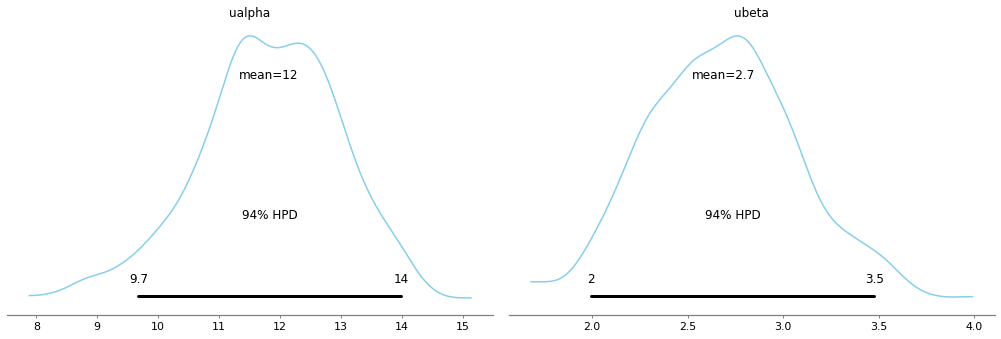

In [31]:
 
    from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ualpha', 'ubeta'],
                color='#87ceeb');

C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


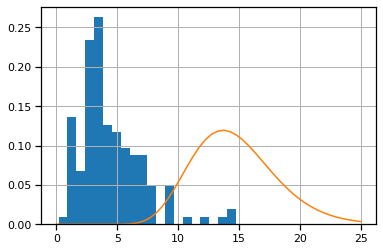

In [32]:
from scipy.stats.distributions import gamma

ualpha_posterior_mean = 12
ubeta_posterior_mean = 2.7

precip.Jan.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ualpha_posterior_mean, ubeta_posterior_mean))

In [33]:
##NORMAL DISTRIBUTION :

from pymc3 import Model, Normal,Gamma

with Model() as rainfall_model:
    nalpha = Normal('nalpha',mu =4.5, sigma=1.5) ##taking mu and sigma based on mean and varience caluculated for precip April
    nbeta = Normal('nbeta', mu=4.5, sigma=1.5) ##taking mu and sigma based on mean and varience calculated for precip April

with rainfall_model:
    Normal_january_like = Gamma('Normal_january_like', alpha=nalpha, beta=nbeta, observed=precip.Jan)

C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pymc3\distributions\continuous.py:88: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\don\Anaconda3\envs\notebook\lib\site-packages\pymc3\distributions\continuous.py:88: UserWarning: The variable specified for beta has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)


In [34]:
from pymc3 import fit

with rainfall_model: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 393.09: 100%|██████████| 10000/10000 [00:07<00:00, 1354.14it/s]
Finished [100%]: Average Loss = 392.99


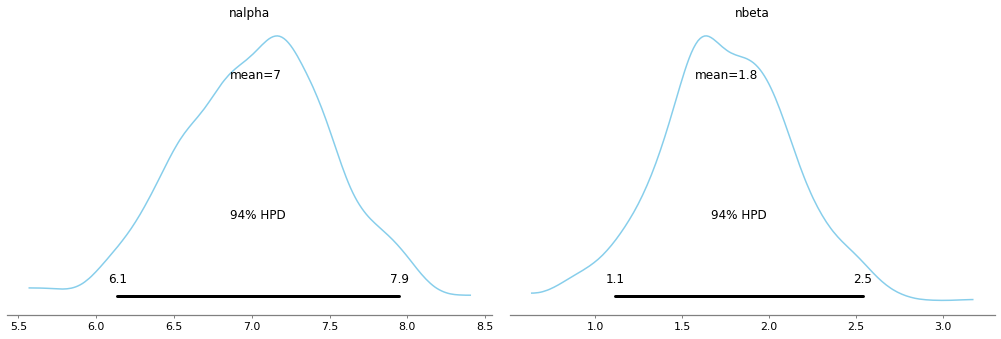

In [35]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['nalpha', 'nbeta'],
                color='#87ceeb');

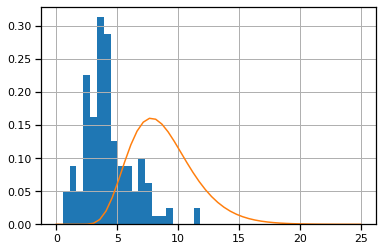

In [34]:
from scipy.stats.distributions import gamma

nalpha_posterior_mean = 7
nbeta_posterior_mean = 1.8

precip.Apr.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), nalpha_posterior_mean, nbeta_posterior_mean))

In [35]:
##EXPONENTIAL DISTRIBUTION :

from pymc3 import Model, Exponential,Gamma


with Model() as rainfall_model:
    ealpha = Exponential('ealpha',0.67) ## lambda calculated based on mean of the april month
    ebeta = Exponential('ebeta',0.67)
    
with rainfall_model:
    Exponential_january_like = Gamma('exponential_january_like', alpha=ealpha, beta=ebeta, observed=precip.Apr)

In [36]:
Exponential.dist(0.67).random(size=10000)

array([0.49061152, 0.99576381, 0.88608094, ..., 0.2158409 , 0.9555767 ,
       0.75957857])

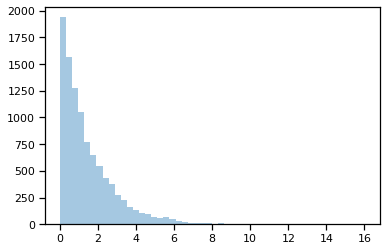

In [37]:
sns.distplot(Exponential.dist(0.67).random(size=10000), kde=False);

In [38]:
from pymc3 import fit

with rainfall_model: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 319.84: 100%|██████████| 10000/10000 [00:07<00:00, 1274.78it/s]
Finished [100%]: Average Loss = 319.75


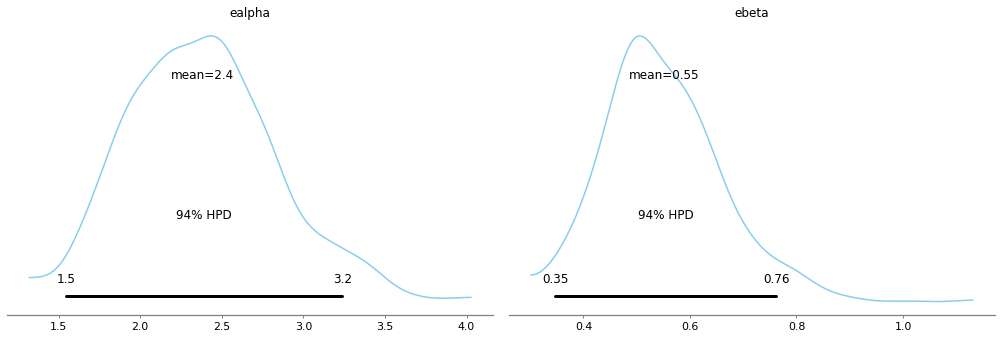

In [39]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha', 'ebeta'],
                color='#87ceeb');

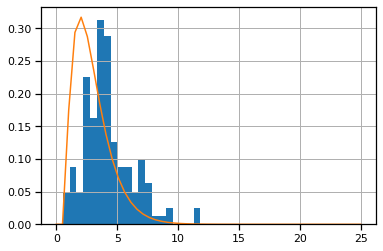

In [40]:
from scipy.stats.distributions import gamma

nalpha_posterior_mean = 2.4
nbeta_posterior_mean = 0.55

precip.Apr.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), nalpha_posterior_mean, nbeta_posterior_mean))

#Exercise 5 : How would you model all months together(one model,all months?)Is that even possible?

In [43]:
## Solving using Exponential for modelling all the months together:

In [55]:
from pymc3 import Model, Exponential,Gamma


with Model() as rainfall_model:
    ealpha = Exponential('ealpha',0.40) ## lambda calculated based on mean of the april month
    ebeta = Exponential('ebeta',0.40)
    
with rainfall_model:
    Exponential_like = Gamma('exponential_like', alpha=ealpha, beta=ebeta, observed=precip)

In [56]:
from pymc3 import fit

with rainfall_model: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 3,818.9: 100%|██████████| 10000/10000 [00:07<00:00, 1333.74it/s]
Finished [100%]: Average Loss = 3,817.7


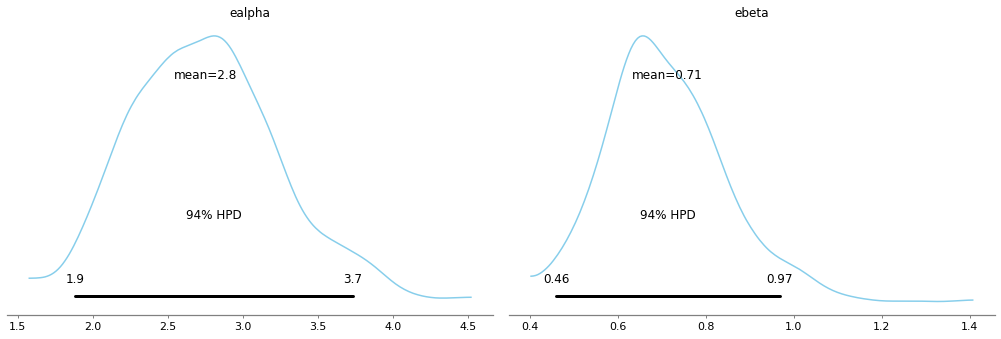

In [57]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha', 'ebeta'],
                color='#87ceeb');

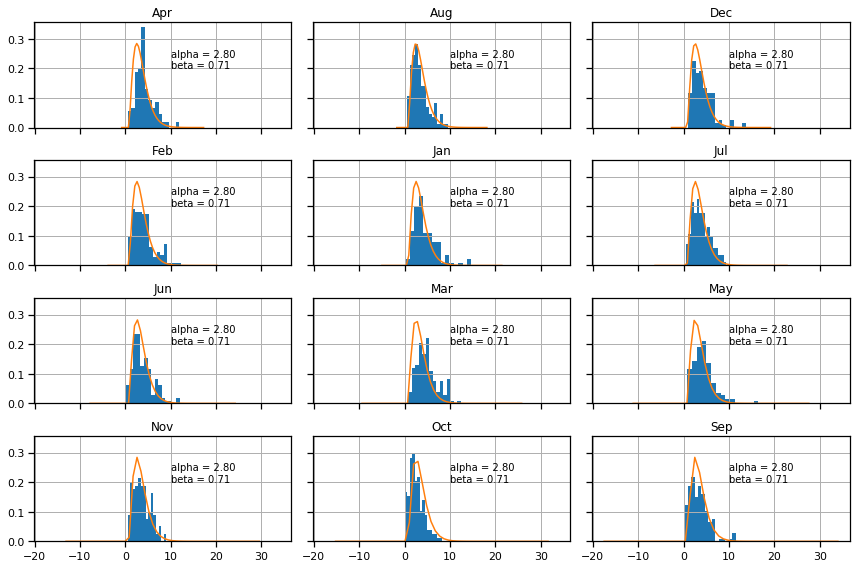

In [60]:
from scipy.stats.distributions import gamma
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

#using for loop to display all the month plot
for ax in axs.ravel():

    # Get month
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x,2.8,0.71))
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(2.8, 0.71)
    ax.annotate(label, xy=(10, 0.2))

plt.tight_layout()

All the month can be modeled using the exponetial distrubtion and it has very good fit for the data